In [2]:
import pandas as pd


In [10]:
df=pd.read_csv('HousingData.csv')

In [11]:
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,NaN,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [12]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [13]:
df.isnull().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [14]:
mean_df=df.mean()

In [15]:
df=df.fillna(mean_df)

In [16]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [17]:
import seaborn as sns

<Axes: >

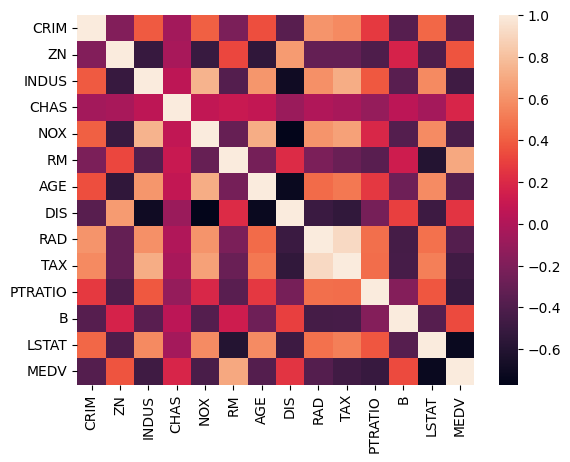

In [18]:
sns.heatmap(df.corr())

In [19]:
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [21]:
#define x feature and y target
y=df['MEDV']
x=df[['ZN','RM']]

In [23]:
#split
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train=train_test_split(x,y,test_size=0.20,random_state=29)

In [24]:
#model selection in linear regression
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [25]:
#train model
model.fit(x_train,y_train)

LinearRegression()

In [26]:
y_predict=model.predict(x_test)

In [27]:
y_predict

array([19.37115313, 15.20310319, 14.84818191, 23.27528725, 15.46701902,
       18.46109856, -0.6773491 , 15.56712502, 13.33749132, 23.89412435,
       25.87804332, 17.81495981, 32.34994331, 17.06871506, 21.64628956,
       28.42619612, 16.79569869, 37.59954621, 25.38661385, 20.25390607,
       20.0567798 , 20.30850934, 20.45411807, 19.55316405, 18.65221002,
       15.12119828, 20.15380006, 33.84569307, 21.6735912 , 20.77745103,
       40.80342616, 19.74908936, 15.37601356, 20.06279461, 25.64167306,
       22.54724359, 18.32459037, 28.01667157, 21.11995715, 32.78560145,
       23.73941508, 20.67301902, 18.96162857, 27.25806602, 31.41598898,
       28.04878706, 20.88184372, 19.92628642, 16.15866049, 22.41005519,
       18.95252803, 24.21055126, 15.24860592, 20.76353663, 17.98787018,
       22.39253431, 22.61143526, 18.26906296, 20.45411807, 35.40188638,
       35.45230527, 17.59654671, 22.45623813, 36.57585678, 18.9070253 ,
       17.84707531, 25.99635042, 23.08417579,  8.81452009, 22.60

In [28]:
#accuracy
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test,y_predict)

0.2530248500900166

In [29]:
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,y_predict)
print(mse)

45.15297022215974
